In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# submission output: id, trip_duration

In [3]:
data = pd.read_csv('train.csv')

In [24]:
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


**store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

In [18]:
data.shape

(1458644, 11)

In [15]:
# max trip duration in minutes
max(data['trip_duration'])/60

58771.366666666669

In [25]:
# min trip duration in minutes
min(data['trip_duration'])/60

0.016666666666666666

In [27]:
# avg trip duration in minutes
np.mean(data['trip_duration'])/60

15.991537882672764

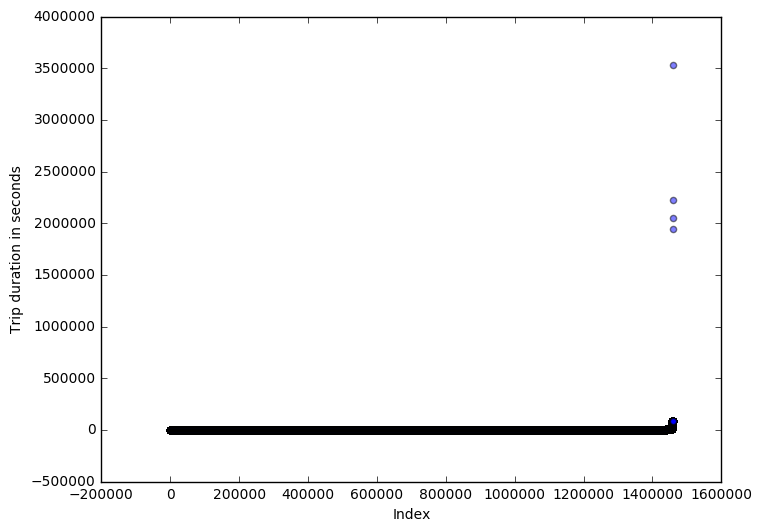

In [29]:
target = data['trip_duration']
f = plt.figure(figsize=(8,6))
plt.scatter(range(len(target)), np.sort(target.values), alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Trip duration in seconds')
plt.show()

In [43]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [32]:
data['pickup_datetime']

0         2016-03-14 17:24:55
1         2016-06-12 00:43:35
2         2016-01-19 11:35:24
3         2016-04-06 19:32:31
4         2016-03-26 13:30:55
5         2016-01-30 22:01:40
6         2016-06-17 22:34:59
7         2016-05-21 07:54:58
8         2016-05-27 23:12:23
9         2016-03-10 21:45:01
10        2016-05-10 22:08:41
11        2016-05-15 11:16:11
12        2016-02-19 09:52:46
13        2016-06-01 20:58:29
14        2016-05-27 00:43:36
15        2016-05-16 15:29:02
16        2016-04-11 17:29:50
17        2016-04-14 08:48:26
18        2016-06-27 09:55:13
19        2016-06-05 13:47:23
20        2016-02-28 02:23:02
21        2016-04-01 12:12:25
22        2016-04-09 03:34:27
23        2016-06-25 10:36:26
24        2016-06-03 08:15:05
25        2016-02-14 13:27:56
26        2016-02-27 21:56:01
27        2016-06-20 23:07:16
28        2016-06-13 21:57:27
29        2016-03-23 14:10:39
                  ...        
1458614   2016-02-08 17:16:07
1458615   2016-02-05 17:57:08
1458616   

In [45]:
data['pickup_day'] = data['pickup_datetime'].dt.day
data['pickup_month'] = data['pickup_datetime'].dt.month
data['pickup_weekday'] = data['pickup_datetime'].dt.weekday
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_day_of_week'] = data['pickup_datetime'].dt.dayofweek
data['dropoff_day_of_week'] = data['dropoff_datetime'].dt.dayofweek

In [46]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_weekday,pickup_hour,pickup_day_of_week,dropoff_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,3,0,17,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,6,6,0,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,1,1,11,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,4,2,19,2,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,26,3,5,13,5,5
